In [45]:
# Library for INT_MAX
import sys


class Graph():

	def __init__(self, vertices, cityList):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]
		self.cityList = cityList

	def printSolution(self, city_names, dist, src):
		print("Vertex \tDistance from Source")
		for node in range(self.V):
			if node == src:
				print(city_names[node], "Source", "\t", dist[node])
			else:
				print(city_names[node], "\t", "\t", dist[node])

	# A utility function to find the vertex with
	# minimum distance value, from the set of vertices
	# not yet included in shortest path tree
	def minDistance(self, dist, sptSet):

		# Initialize minimum distance for next node
		min = sys.maxsize
		# Search not nearest vertex not in the
		# shortest path tree
		for u in range(self.V):
			if dist[u] < min and sptSet[u] == False:
				min = dist[u]
				min_index = u

		return min_index

	# Function that implements Dijkstra's single source
	# shortest path algorithm for a graph represented
	# using adjacency matrix representation
	def dijkstra(self, src, cityList):

		dist = [sys.maxsize] * self.V
		dist[src] = 0
		sptSet = [False] * self.V
		route = []

		for cout in range(self.V):

			# Pick the minimum distance vertex from
			# the set of vertices not yet processed.
			# x is always equal to src in first iteration
			x = self.minDistance(dist, sptSet)

			# Put the minimum distance vertex in the
			# shortest path tree
			sptSet[x] = True
			# Update dist value of the adjacent vertices
			# of the picked vertex only if the current
			# distance is greater than new distance and
			# the vertex in not in the shortest path tree
			for y in range(self.V):
				if self.graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + self.graph[x][y]:
					print(self.graph[x][y])
					print('___________________')
					dist[y] = dist[x] + self.graph[x][y]
								
		
		self.printSolution(cityList, dist, src)

Reading the file, creating an adjacency matrix and the main()

In [46]:
import pandas as pd

if __name__ == "__main__":
    col_names = ['From City', 'To City', 'Distance']
    file = pd.read_csv("city 1.txt", delimiter=r'\s+', names=col_names) #Reading the datafile and specifying the delimiter

    file = file.to_numpy()  #change the datatype from pandas.dataframe to a numpy array
    city_names = []         #Create an empty list for the city names

    #Append the city names to the list, NOTE the not in argument
    for i in range(0, len(file)):
        if file[i][0] not in city_names:
            city_names.append(file[i][0])
        if file[i][1] not in city_names:
            city_names.append(file[i][1])

    city_names = sorted(city_names) #Sort the city names list

    city_indices = {city: i for i, city in enumerate(city_names)} #Give every city name am index for future use

    adj_mat = [[0] * len(city_names) for _ in range(len(city_names))] #Creates an empty matrix of the correct size and sets all the values to None

    # Where there is a connection change from None to the given distance
    for row in file:
        city1, city2, dist = row
        i = city_indices[city1]
        j = city_indices[city2]
        adj_mat[i][j] = dist
        adj_mat[j][i] = dist
    g = Graph(len(city_names), city_names)
    g.graph = adj_mat

    g.dijkstra(5, city_names) # Sending the index of city 5 as an argument

3
___________________
7
___________________
2
___________________
7
___________________
3
___________________
1
___________________
5
___________________
2
___________________
4
___________________
2
___________________
2
___________________
5
___________________
4
___________________
4
___________________
5
___________________
3
___________________
2
___________________
1
___________________
9
___________________
6
___________________
2
___________________
3
___________________
1
___________________
2
___________________
1
___________________
4
___________________
Vertex 	Distance from Source
A 	 	 5
B 	 	 3
C 	 	 5
D 	 	 8
E 	 	 7
F Source 	 0
G 	 	 9
H 	 	 9
I 	 	 13
J 	 	 4
K 	 	 10
L 	 	 2
M 	 	 7
N 	 	 6
O 	 	 7
P 	 	 8
R 	 	 3
S 	 	 7
V 	 	 9
W 	 	 6
X 	 	 6
Y 	 	 1
Z 	 	 8


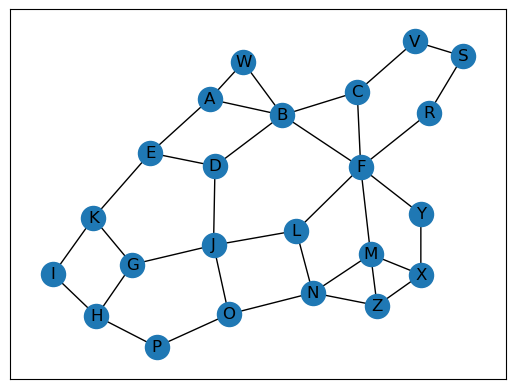

In [47]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


# Defining a Class
class GraphVisualization:

	def __init__(self):
		
		# visual is a list which stores all
		# the set of edges that constitutes a
		# graph
		self.visual = []
		
	# addEdge function inputs the vertices of an
	# edge and appends it to the visual list
	def addEdge(self, a, b):
		temp = [a, b]
		self.visual.append(temp)
		
	# In visualize function G is an object of
	# class Graph given by networkx G.add_edges_from(visual)
	# creates a graph with a given list
	# nx.draw_networkx(G) - plots the graph
	# plt.show() - displays the graph
	def visualize(self):
		G = nx.Graph()
		G.add_edges_from(self.visual)
		nx.draw_networkx(G)
		plt.show()

# Driver code
G = GraphVisualization()
G.addEdge('A', 'B')
G.addEdge('A', 'E')
G.addEdge('A', 'W')
G.addEdge('B', 'D')
G.addEdge('B', 'W')
G.addEdge('B', 'C')
G.addEdge('B', 'F')
G.addEdge('C', 'F')
G.addEdge('C', 'V')
G.addEdge('D', 'E')
G.addEdge('D', 'J')
G.addEdge('E', 'K')
G.addEdge('F', 'L')
G.addEdge('F', 'M')
G.addEdge('F', 'R')
G.addEdge('F', 'Y')
G.addEdge('G', 'K')
G.addEdge('G', 'J')
G.addEdge('G', 'H')
G.addEdge('H', 'I')
G.addEdge('H', 'P')
G.addEdge('I', 'K')
G.addEdge('J', 'O')
G.addEdge('J', 'L')
G.addEdge('L', 'N')
G.addEdge('M', 'N')
G.addEdge('M', 'Z')
G.addEdge('M', 'X')
G.addEdge('N', 'O')
G.addEdge('O', 'P')
G.addEdge('R', 'S')
G.addEdge('S', 'V')
G.addEdge('X', 'Z')
G.addEdge('Y', 'X')
G.addEdge('Z', 'N')
G.visualize()


